In [165]:
import pandas as pd
import numpy as np


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate , train_test_split , StratifiedShuffleSplit, cross_val_score
from sklearn import   linear_model, metrics
from sklearn.linear_model import SGDClassifier as SGD
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
train_directory = "train.csv"

train = pd.read_csv(train_directory, header=0 )

train['y'] = [1 if y == 'yes' else 0 for y in train['y']]

In [17]:
train.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [3]:
X = train[['age' , 'previous']][:]
y = train['y'][:]

In [4]:
classifier = RandomForestClassifier()

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                                                                                     test_size = 0.2)

In [6]:
classifier.fit(train_data , train_labels)

C:\Users\phomi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
pred_labels = classifier.predict(test_data)

In [8]:
metrics.roc_auc_score(test_labels, pred_labels)

0.5679203539823008

C:\Users\phomi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\phomi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


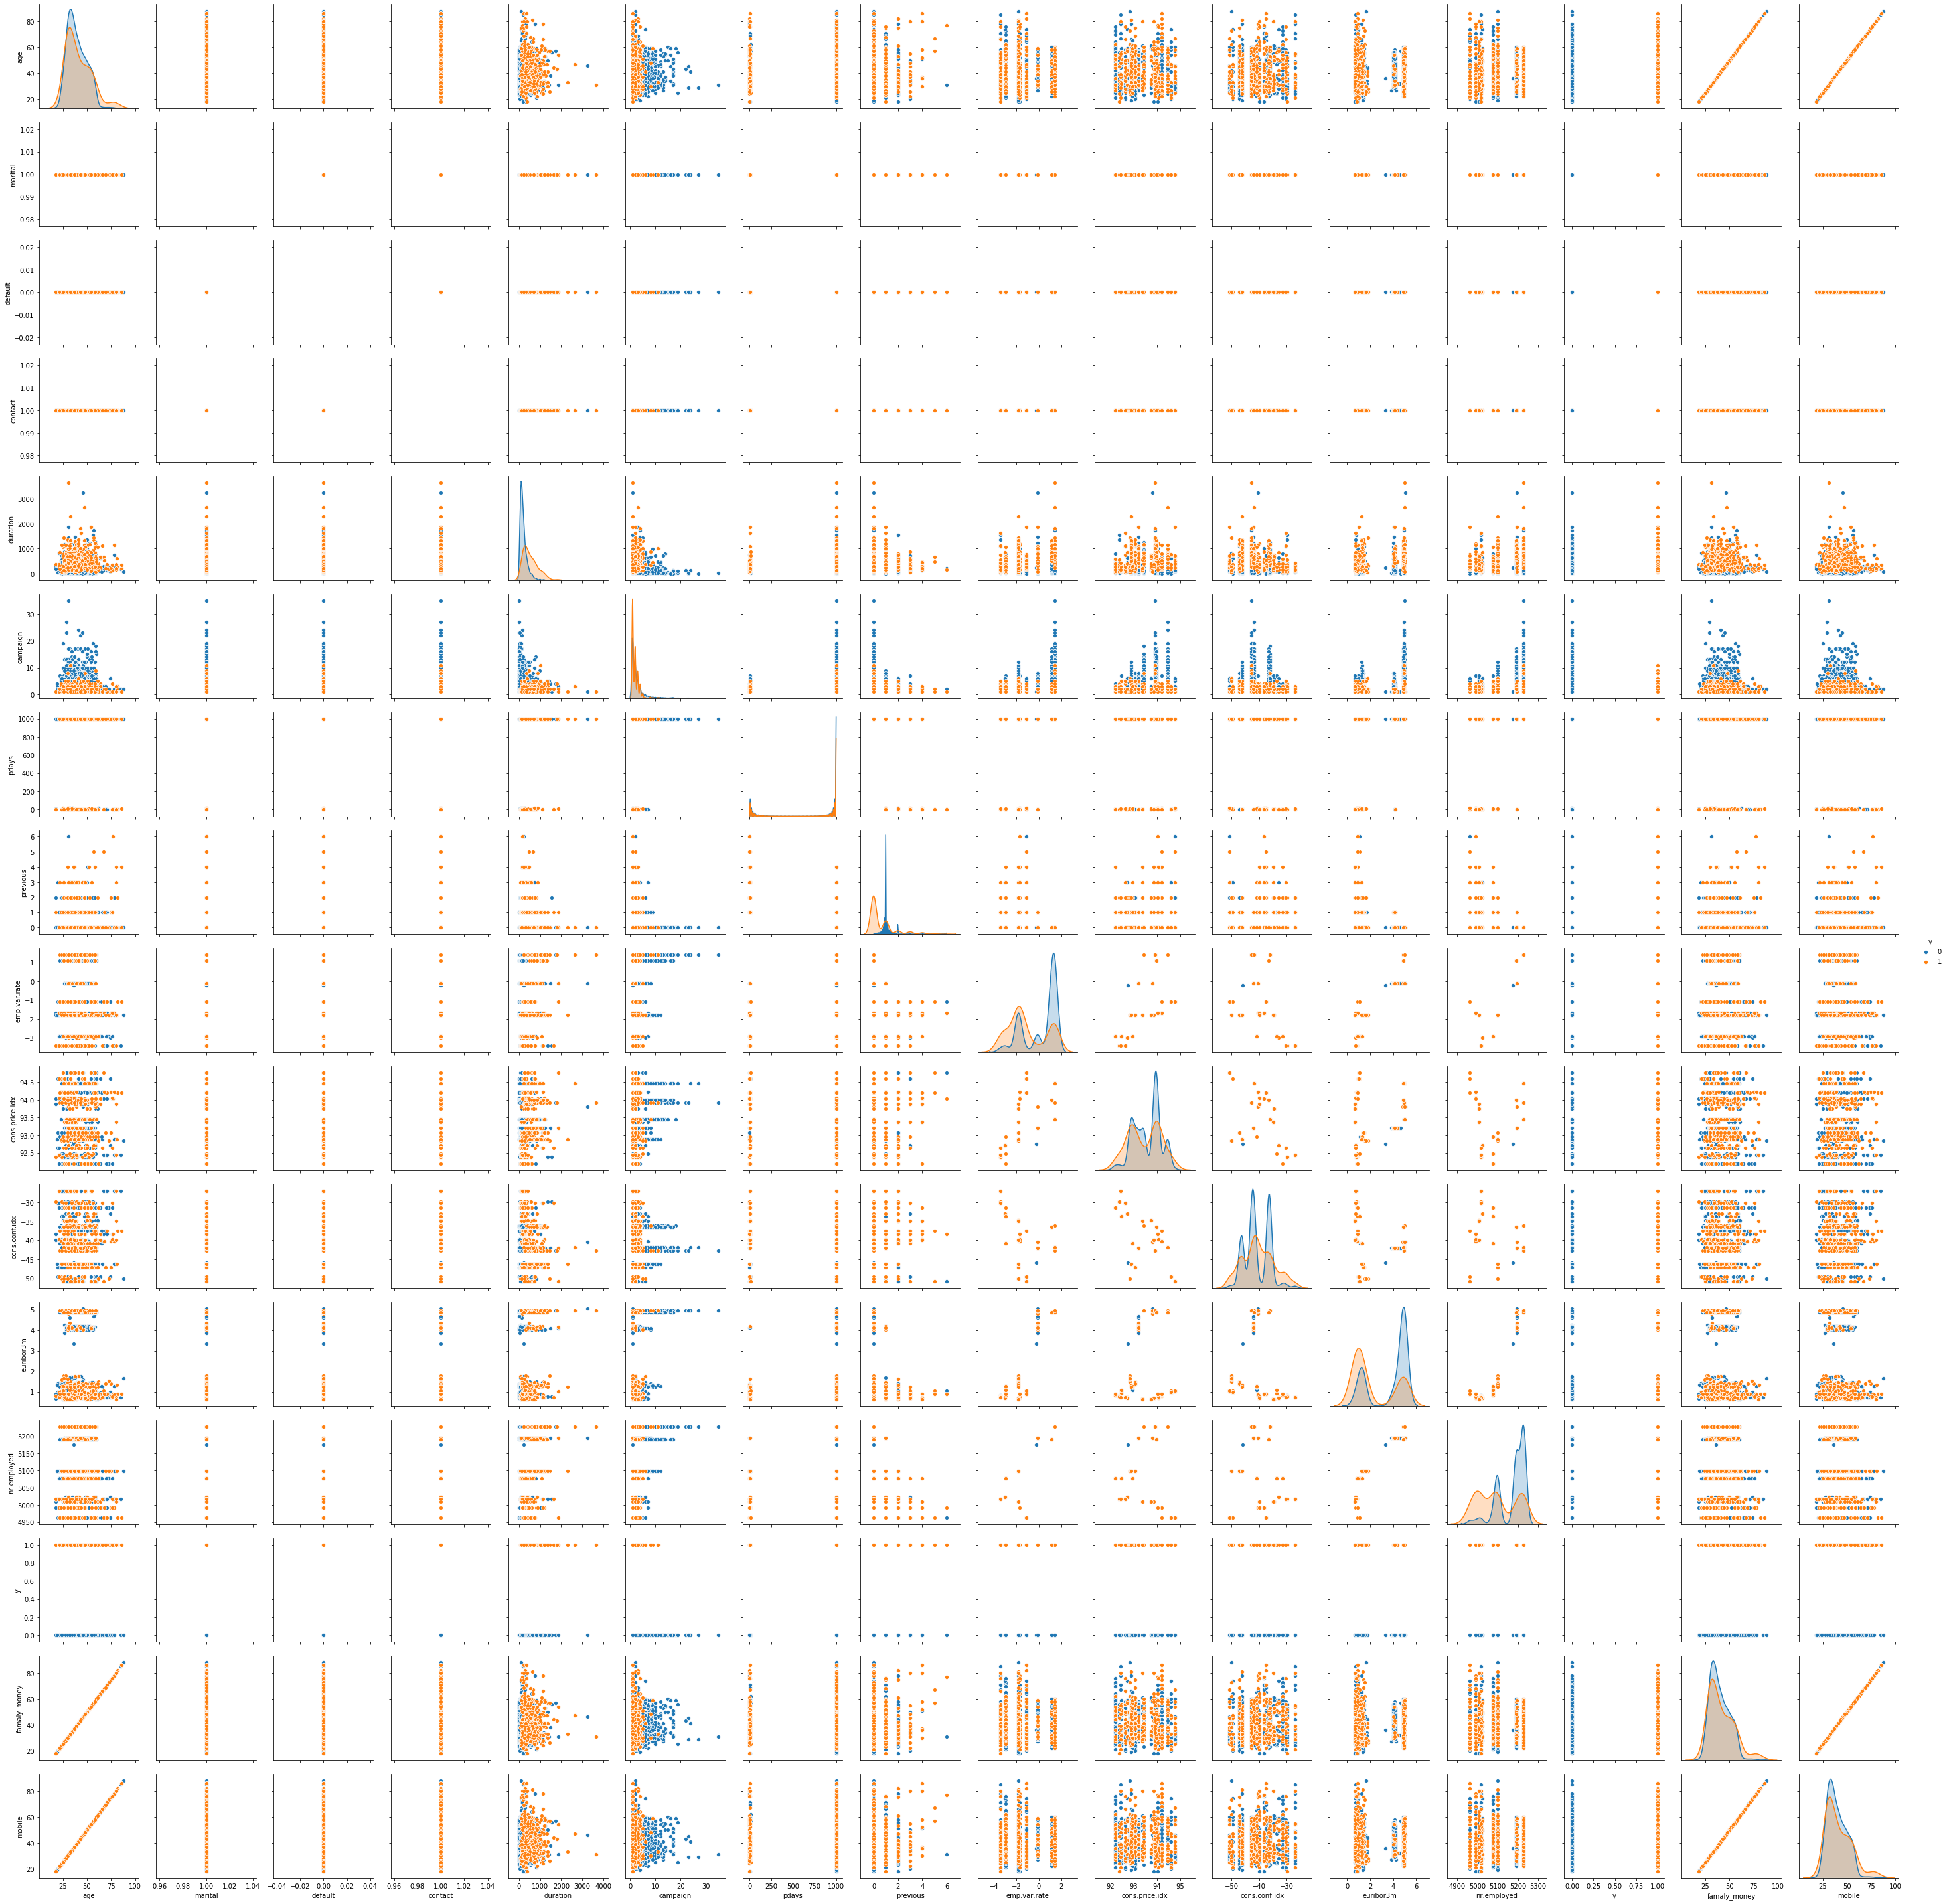

In [163]:
sns.pairplot(train, hue='y') # посмотрим парные графики, визуально можно увидеть зависимости

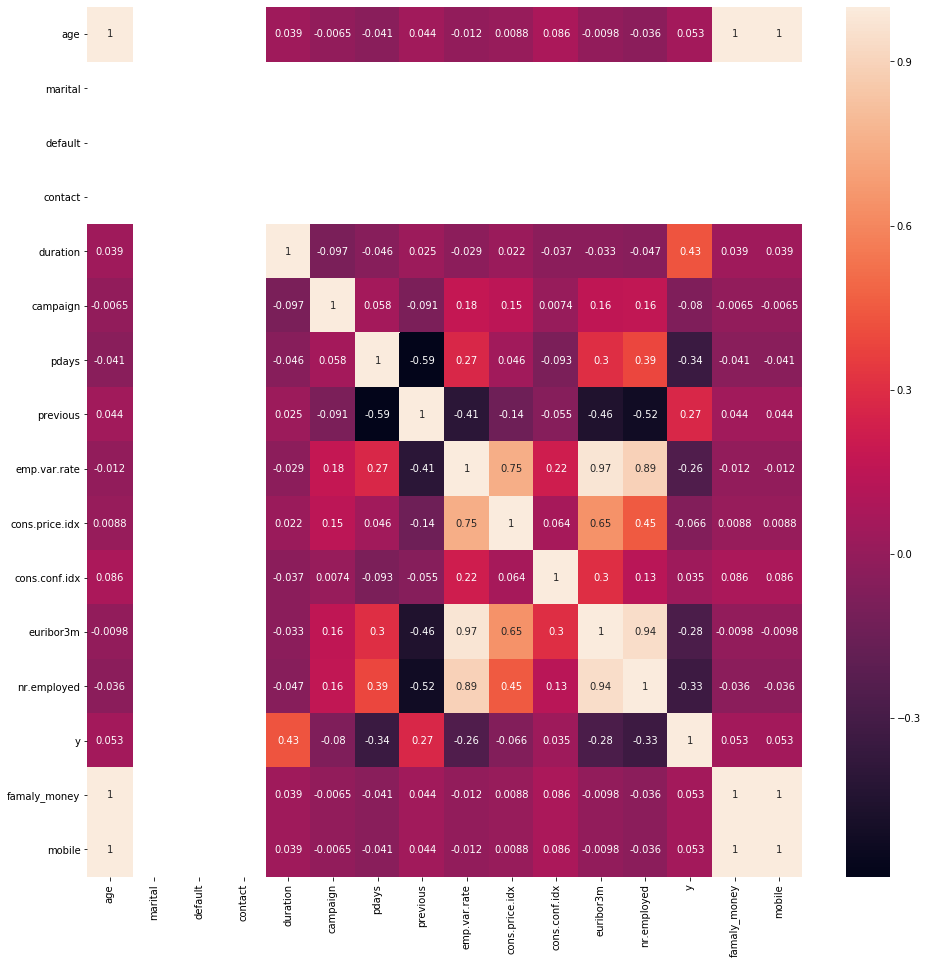

In [166]:
plt.figure (figsize=(16,16)) # посмотрим корреляцию Пирсона, чтобы выявить какие колонки можно отбросить
sns.heatmap(train.corr(),annot=True,);

In [199]:
#конвертируем качественные признаки в числовые
train['contact'] = [1 if contact == 'cellular' else 0 for contact in train['contact']]

In [200]:
train['default'] = [1 if default == 'yes' else 0 for default in train['default']] #значение по умолчанию важно при определении итогового значения

In [201]:
train['mobile']=train['age']*train['contact'] #наличие мобильного телефона связано с возрастом. 
                                                    #При этом наоичие мобильного телефона понижает вероятность просроченности платежа
                                                    #т.к. проще связаться с пользователем и у него более мобильное информирование

In [188]:
train['mobile'].head()

0    30
1     0
2     0
3     0
4    47
Name: mobile, dtype: int64

In [236]:
X = train[['age' , 'default', 'mobile','previous']][:]

In [237]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                                                                                     test_size = 0.2)

In [238]:
classifier.fit(train_data , train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [239]:
pred_labels = classifier.predict(test_data)

In [240]:
metrics.roc_auc_score(test_labels, pred_labels)

0.5782056136697118

In [241]:
#кросс валидация на 5 фолдов
ridge_scoring = cross_val_score(classifier, train_data,train_labels,scoring = 'roc_auc', cv=5)

In [242]:
ridge_scoring

array([0.64297546, 0.67881343, 0.65888044, 0.61947445, 0.66012131])

In [243]:
np.mean(ridge_scoring)

0.6520530174131364

In [ ]:
#Дальнейшие улучшения модели: уточнить значения последних параметров,   отфильтровать данные, поработать с качественными признаками, посмотреть распределение и аномалии, посмотреть другие алгоритмы